# Problem Statement
**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step - 1: Load Dataset**

In [2]:
dataset = pd.read_csv('web_traffic.tsv',delimiter='\t',header=None)
dataset.columns = ['Hours', 'Hits']
dataset.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


# Data Preprocessing
- Dealing with Missing values (Removing Missing values)

In [4]:
dataset = dataset.dropna(axis=0)
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


**Converting into values (array)**

In [5]:
X = dataset.iloc[:,0:1].values # Independent (shape in X)
y = dataset.iloc[:,-1].values # Dependent (not necessary to maintain in y)
X.shape, y.shape

((735, 1), (735,))

**Visualize data**

In [6]:
plt.style.use('fivethirtyeight')

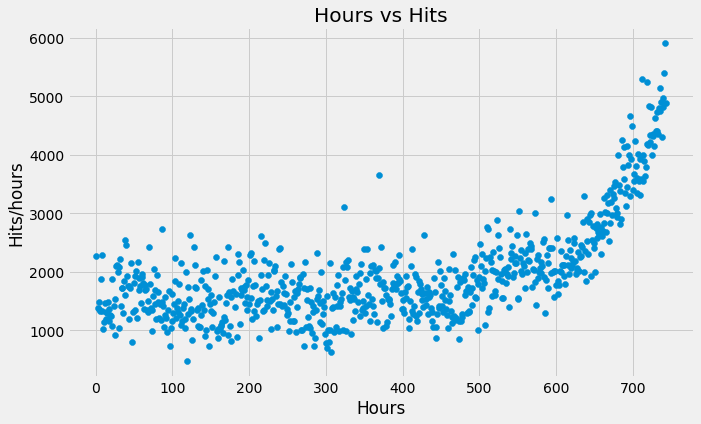

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.title('Hours vs Hits')
plt.show()

**Correlation**

In [8]:
dataset.corr()

,Hours,Hits
Hours,1.000000,0.645232
Hits,0.645232,1.000000


**Spliting Data into trainig and testing**

In [9]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train, x_test , y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 0)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((588, 1), (147, 1), (588,), (147,))

# Bulding Machine Leanring model
- Linear Regresssion

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(x_train, y_train) # fitting a regression curve

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = model.predict(x_test) # for model evaluation 
y_pred_full = model.predict(X) # for just drawing a line

** Model Evaluation**
- **$R^2$**  --- Near to one
- Mean Absolute Error  --- Near to zero
- Mean Square Error --- Near to zero

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [16]:
r2 = r2_score(y_test,y_pred) # R Squared
mae = mean_absolute_error(y_test,y_pred) # mean aboulute error
mse = mean_squared_error(y_test,y_pred) # mean squared error

print('R_2 Score :',r2)
print('Mean Absolute Error : ', mae)
print('Mean Squared Error : ', mse)

R_2 Score : 0.421117804775
Mean Absolute Error :  449.057529843
Mean Squared Error :  373037.699863


** Visualizing Linear Regression**

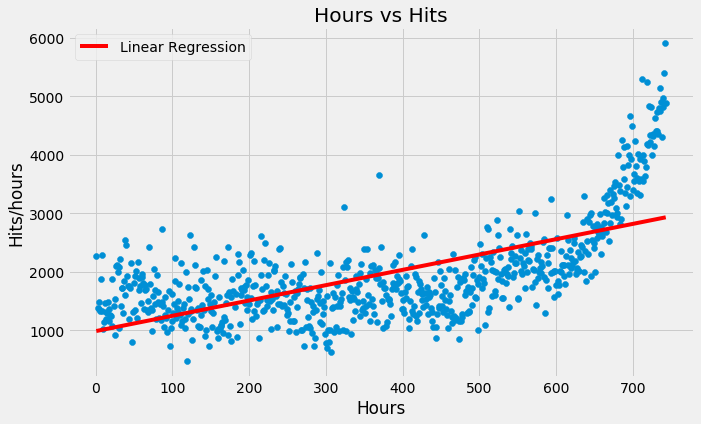

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X,y) # scatter plot
plt.plot(X,y_pred_full,'r') #  regression line
plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression'])
plt.show()

** $ y  = b_0 + b_1 x $**

In [18]:
b0 = model.intercept_
b1 = model.coef_

In [19]:
print('intercept = ' ,b0)
print('coefficent = ',b1)

intercept =  988.567858369
coefficent =  [ 2.61731891]


In [20]:
hours = (100000 - b0)/b1

In [21]:
print('It will going to hit 1,00,000 hit/hours is @ {} week'.format(int(hours[0]/(24*7))))

It will going to hit 1,00,000 hit/hours is @ 225 week


## Polynomial Linear Regression**
- degree = 2
- degree = 3

In [23]:
X2 = np.concatenate((X,X**2), axis = 1) # appending ploy degree = 2
X3 = np.concatenate((X,X**2,X**3), axis = 1) # appending ploy degree = 2, 3

# Machine Learning model 
- Polynomial Linear Regression - degree = 2
- Polynomial Linear Regression - degree = 3

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
poly_2 = LinearRegression() # for degree = 2
poly_3 = LinearRegression() # for degree = 3

*training or fitting model*

In [27]:
poly_2.fit(X2,y) # for degree = 2 
poly_3.fit(X3,y) # for degree = 3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Model Evaluation**

In [28]:
y_pred_ploy2 = poly_2.predict(X2) 
y_pred_ploy3 = poly_3.predict(X3) 

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [33]:
print("="*10+'Polynomial Regression degree = 2'+"="*10+'\n')
r2_2 = r2_score(y,y_pred_ploy2)
mae_2 = mean_absolute_error(y,y_pred_ploy2)
mse_2 = mean_squared_error(y,y_pred_ploy2)
print('R2 score :', r2_2)
print('Mean Absolute Error : ',mae_2)
print('Mean Squared Error : ',mse_2)
print('\n')

print("="*10+'Polynomial Regression degree = 3'+"="*10+'\n')
r2_3 = r2_score(y,y_pred_ploy3)
mae_3 = mean_absolute_error(y,y_pred_ploy3)
mse_3 = mean_squared_error(y,y_pred_ploy3)
print('R2 score :', r2_3)
print('Mean Absolute Error : ',mae_3)
print('Mean Squared Error : ',mse_3)

==========Polynomial Regression degree = 2==========

R2 score : 0.669012298506
Mean Absolute Error :  389.266318998
Mean Squared Error :  244875.520923


==========Polynomial Regression degree = 3==========

R2 score : 0.743736609983
Mean Absolute Error :  344.103697049
Mean Squared Error :  189592.032696


**Visualizing Regression**

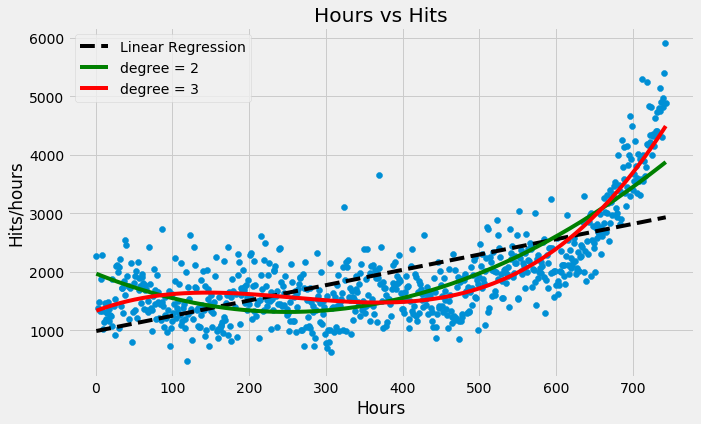

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(X,y) # scatter plot
plt.plot(X,y_pred_full,'--k') #  Linear Regression
plt.plot(X,y_pred_ploy2,'g') # degree = 2
plt.plot(X,y_pred_ploy3,'r') # degree = 3

plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression','degree = 2', 'degree = 3'])
plt.show()

# Roots of equation

In [54]:
b02 = poly_2.intercept_
b12 = poly_2.coef_
# degree 3
b03 = poly_3.intercept_
b13 = poly_3.coef_

**For degree = 2**

In [56]:
print(b02)
print(b12)

1974.76081696
[-5.2654565   0.01053222]


In [58]:
coef2 = [0.0105, -5.2654, 1974.7608-100000]
coef2

[0.0105, -5.2654, -98025.2392]

In [59]:
roots = np.roots(coef2)
roots

array([ 3316.44764995, -2814.98098328])

**Don't consider negative and complex numbers**

In [62]:
hours = 3316.44
weeks = int(hours/(24*7))
print('for degree = 2')
print('It will going to hit 1,00,000 hits/ hours @ %r weeks'% weeks)

for degree = 2
It will going to hit 1,00,000 hits/ hours @ 19 weeks


**For degree = 3**

In [64]:
print(b03)
print(b13)

1333.28796551
[  4.94226019e+00  -2.35893797e-02   3.04960132e-05]


In [66]:
coef3 = [3.0496e-05, -2.3589e-02, 4.9422, 1333.2879-100000]
coef3

[3.0496e-05, -0.023589, 4.9422, -98666.7121]

In [67]:
roots = np.roots(coef3)
roots

array([ 1744.15000306   +0.j        ,  -485.31936145+1272.58211799j,
        -485.31936145-1272.58211799j])

**Don't consider negative and complex numbers**

In [68]:
hours = 1744.15
weeks = int(hours/(24*7))
print('for degree = 3')
print('It will going to hit 1,00,000 hits/ hours @ %r weeks'% weeks)

for degree = 3
It will going to hit 1,00,000 hits/ hours @ 10 weeks
